# Utilities for calculating CMIP averages, first created to process TOA fluxes. 
# Computes both seasonal and total averages. 



In [39]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
# from fetch_model_helper import *
%run fetch_model_helper.py
import diurnal_config
%run cmip_metrics.py

In [41]:
# start_date = '1985-01'
# end_date = '2006-01'

# CMIP6
# start_date = '2000-01'
# end_date = '2015-01'

# CMIP6 30 year
start_date = '1985-01'
end_date = '2015-01'

# # CMIP5 15 year
# cmip_identifier = 'CMIP5'
# start_date = '1991-01'
# end_date = '2006-01'

# ## CMIP5 30 year
# cmip_identifier = 'CMIP5'
# start_date = '1976-01'
# end_date = '2006-01'


# cmip_identifier = 'CMIP5'
cmip_identifier = 'CMIP6'
# field_name = 'clt'
field_name = 'pr'

In [45]:
# rel_cmip6_path= '/export/data1/cchristo/CMIP6_clouds/clt_mon_historical/'
# rel_cmip6_path= '/export/data1/cchristo/CMIP6_clouds/cl_mon_historical/'
rel_cmip6_path= '/export/data1/cchristo/CMIP6_precip/pr_3hr_historical/'
# rel_cmip6_path = '/export/data1/cchristo/CMIP6_rh/hur_mon_historical/'

# rel_cmip5_path= '/export/data1/cchristo/CMIP5_clouds/clt_mon_historical/'
# rel_cmip5_path= '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/'


save_output_rel_dir = '/export/data1/cchristo/CMIP6_precip/averages/time_averages/period/pr_3hr_30yr/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP6_rh/averages/time_averages/period/rh_500/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP6_clouds/averages/clt_averages/period/clt/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP6_clouds/averages/time_averages/period/clt_30yr/'

# save_output_rel_dir = '/export/data1/cchristo/CMIP6_clouds/averages/time_averages/period/clt/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP5_clouds/averages/time_averages/period/clt/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP5_clouds/averages/time_averages/period/clt_30yr/'
# save_output_rel_dir = '/export/data1/cchristo/CMIP5_precip/averages/time_averages/period/pr_3hr_30yr/'

unique_cmip6_models = get_unique_models(rel_cmip6_path)
# unique_cmip5_models = get_unique_models(rel_cmip5_path)

cmip_rel_dir = rel_cmip6_path

In [46]:
# print(unique_cmip5_models)
print(unique_cmip6_models)

{'AWI-CM-1-1-MR', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MPI-ESM-1-2-HAM', 'CMCC-CM2-SR5', 'KACE-1-0-G', 'AWI-ESM-1-1-LR', 'GISS-E2-1-G', 'FGOALS-g3', 'ACCESS-CM2', 'EC-Earth3-Veg-LR', 'SAM0-UNICON', 'CanESM5', 'MIROC6', 'MRI-ESM2-0', 'EC-Earth3-Veg', 'MPI-ESM1-2-LR', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'ACCESS-ESM1-5', 'IPSL-CM6A-LR', 'NESM3', 'MIROC-ES2L', 'GFDL-CM4', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'GFDL-ESM4', 'EC-Earth3'}


In [39]:

# unique_cmip6_models.intersection(set(cmip6_ecs.keys()))

In [50]:
ds = xr.open_dataset(rel_cmip6_path + 'cl_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_199001-200912.nc')
ds2 = xr.open_dataset(rel_cmip6_path + 'cl_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_199001-200912.nc')
ds3 = xr.open_dataset(rel_cmip6_path + 'cl_Amon_MIROC6_historical_r1i1p1f1_gn_199001-199912.nc')

In [49]:
# def ds_operation(ds):
#     return ds.groupby('time.season').mean()

def ds_operation(ds):
    '''Take mean of field in time. '''
    return ds.mean(dim = 'time', skipna = True)



# def ds_operation(ds):
#     '''Take find mean clouds cover in level. '''
    
# #     low_mean = ds.sel(lev = slice(1,0.68), time = slice(start_date, end_date)).max('lev').mean(['time'])
# #     low_mean = low_mean.rename({'cl':'cltl'})
#     high_mean = ds.sel(lev = slice(0.44,0), time = slice(start_date, end_date)).max('lev').mean(['time'])
#     high_mean = high_mean.rename({'cl':'clth'})
    
#     return high_mean


# def ds_operation(ds):
#     '''Get mean 500mb RH.'''
#     return ds.sel(plev = 50000).mean(['time'])

In [51]:
# get 
failed_models = []
for model_name in unique_cmip6_models:
        print(model_name)
        save_output_rel_dir_model = save_output_rel_dir + model_name + '/'
        save_output_path = save_output_rel_dir_model + start_date + '_' + end_date + '_mean.nc'
        try: 
            path_to_cmip_files =  get_path_to_desired_model_cmip6(cmip_rel_dir, 
                                                  desired_model= model_name,
                                                  desired_ensemble_member = ('r1i1p1f1', 'r1i1p2f1','r1i1p1f2'),
                                                  desired_grid_types = ('gn', 'gr', 'gr1', 'gr2'))
#             path_to_cmip_files = get_path_to_desired_model_cmip5(cmip_rel_dir, 
#                                   desired_model=model_name,
#                                   desired_ensemble_member = ('r1i1p1','r6i1p1','r2i1p1'))

#             print(path_to_cmip_files)
    #         print(path_to_cmip_files)
            # subset lat/lon and time
            print('Opening data...')
            ds = xr.open_mfdataset(path_to_cmip_files, combine='by_coords')
    #         ds.load()
            ds = ds.sel(time = slice(start_date, end_date))
            ds = ds.sel(lat= slice(-60, 60))

            # compute seasonal/ total time means
    #         seasonal_mean = ds.groupby('time.season').mean()
    #         total_time_mean = ds.mean(dim = 'time')
            ds_mean = ds_operation(ds)

            # make dir for model if it doesn't already exist
            if not os.path.exists(save_output_rel_dir_model):
                os.makedirs(save_output_rel_dir_model)
    #         print(path_to_cmip_files)
            # save
            ds_mean.to_netcdf(save_output_path)
        except Exception as e:
            print('Could not process ', model_name, ' Reason: ', str(e))
            failed_models.append(model_name)
            
# delete model dirs if calculation was not performed.
for model_name in failed_models:
    save_output_rel_dir_model = save_output_rel_dir + model_name + '/'
    try:
        shutil.rmtree(save_output_rel_dir_model)
    except FileNotFoundError as e:
        print(model_name, " doesn't exist.") 
        

AWI-CM-1-1-MR
Opening data...
UKESM1-0-LL
Opening data...
MPI-ESM1-2-HR
Opening data...
MPI-ESM-1-2-HAM
Opening data...
CMCC-CM2-SR5
Opening data...
KACE-1-0-G
Opening data...
AWI-ESM-1-1-LR
Opening data...
GISS-E2-1-G
Opening data...
FGOALS-g3
Opening data...
ACCESS-CM2
Opening data...
EC-Earth3-Veg-LR
Opening data...
SAM0-UNICON
Opening data...
CanESM5
Opening data...
MIROC6
Opening data...
MRI-ESM2-0
Opening data...
EC-Earth3-Veg
Opening data...
MPI-ESM1-2-LR
Opening data...
CNRM-CM6-1-HR
Opening data...
CNRM-ESM2-1
Opening data...
ACCESS-ESM1-5
Opening data...
IPSL-CM6A-LR
Opening data...
NESM3
Opening data...
MIROC-ES2L
Opening data...
GFDL-CM4
Opening data...
CNRM-CM6-1
Opening data...
BCC-CSM2-MR
Opening data...
GFDL-ESM4
Opening data...
EC-Earth3
Opening data...


In [24]:
failed_models

['HadGEM3-GC31-LL', 'HadGEM3-GC31-MM']

MCM-UA-1-0  doesn't exist.
HadGEM3-GC31-LL  doesn't exist.
CESM2  doesn't exist.
CESM2-WACCM  doesn't exist.
CESM2-FV2  doesn't exist.
ACCESS-CM2  doesn't exist.
CESM2-WACCM-FV2  doesn't exist.
CAS-ESM2-0  doesn't exist.
ACCESS-ESM1-5  doesn't exist.
UKESM1-0-LL  doesn't exist.
HadGEM3-GC31-MM  doesn't exist.
EC-Earth3  doesn't exist.
IPSL-CM6A-LR  doesn't exist.


FileNotFoundError

In [27]:
total_time_mean['rlut'].plot.imshow(cmap = plt.get_cmap('gist_ncar'))

NameError: name 'total_time_mean' is not defined

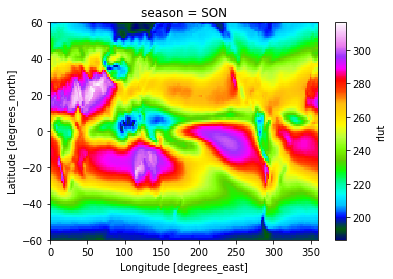

In [37]:
# path_to_cmip_files
seasonal_mean['rlut'].isel(season = 3).plot.imshow(cmap = plt.get_cmap('gist_ncar'))